In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show,output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [9]:
df=pd.read_csv('logreg.csv')
df.head()

,Unnamed: 0,Subject ID,MRI ID,Demented,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,5,OAS2_0004,OAS2_0004_MR1,0,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,6,OAS2_0004,OAS2_0004_MR2,0,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
4,7,OAS2_0005,OAS2_0005_MR1,0,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [3]:
f=df.loc[df['M/F']=='F','Demented']
female_dementia_rate=sum(f)/len(f)
print(f'Rate of females having Dementia: {female_dementia_rate}')

Rate of females having Dementia: 0.2833333333333333


In [4]:
m=df.loc[df['M/F']=='M','Demented']
male_dementia_rate=sum(m)/len(m)
print(f'Rate of males having Dementia: {male_dementia_rate}')

Rate of males having Dementia: 0.5547445255474452


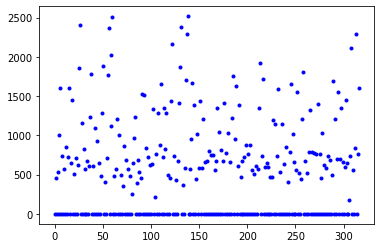

In [5]:
plt.plot(df['MR Delay'],'b.')

In [6]:
r=df.loc[df['Hand']=='R','Demented']
Righthanded_dementia_rate=sum(r)/len(r)
print(f'Rate of Right Hand user having Dementia: {Righthanded_dementia_rate}')

Rate of Right Hand user having Dementia: 0.40063091482649843


In [10]:
Features=['Visit','MR Delay','M/F','Hand','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']
X=df[Features]
X.head()
y=df['Demented']

In [11]:
x=pd.get_dummies(X)
x.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M,Hand_R
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,1,1
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,1,1
2,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,1,0,1
3,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462,1,0,1
4,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,0,1,1


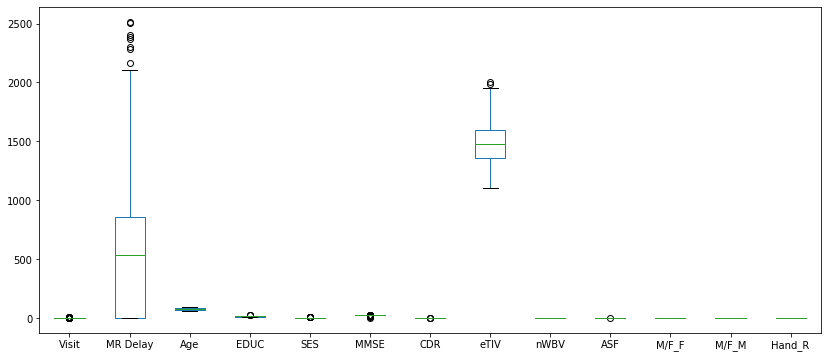

In [12]:
x.plot(kind='box',figsize=(14,6))

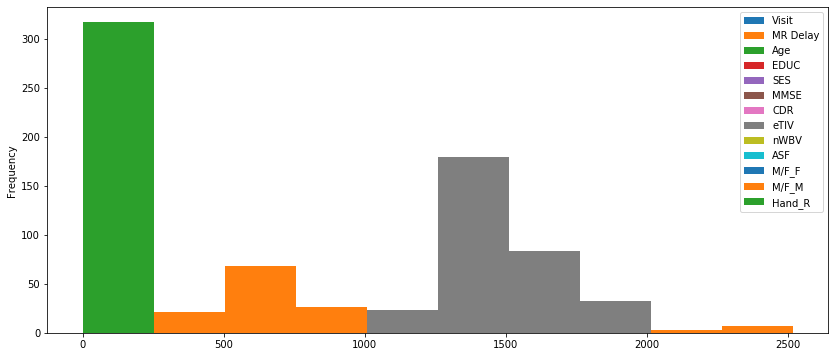

In [13]:
x.plot(kind='hist',figsize=(14,6))

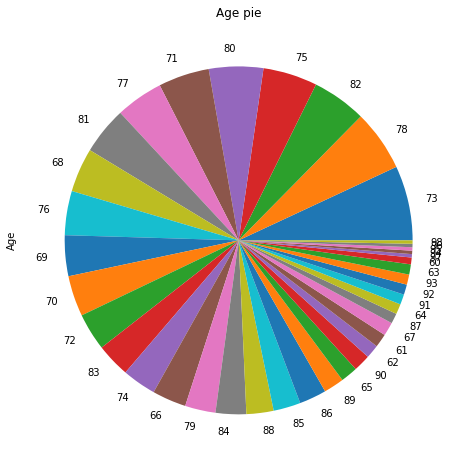

In [14]:
x['Age'].value_counts().plot(kind='pie',figsize=(8,8),title='Age pie')

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=0)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=1)
model.fit(x_train,y_train)
predicted_model=model.predict(x_val)
mean_absolute_error(y_val,predicted_model)

0.0125

In [17]:
predicted_model

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.])

In [18]:
y_val.to_numpy()

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

Text(0.5, 1.0, 'predicted_model vs y_val')

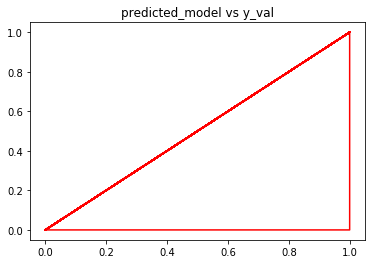

In [19]:
plt.plot(predicted_model,y_val, color='red')
plt.title('predicted_model vs y_val')

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [21]:
predicted_model2=LR.predict(x_val)
mean_absolute_error(y_val,predicted_model2)

0.2625

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train,y_train)
predictions = model.predict(x_val)
mean_absolute_error(y_val,predictions)

0.0125

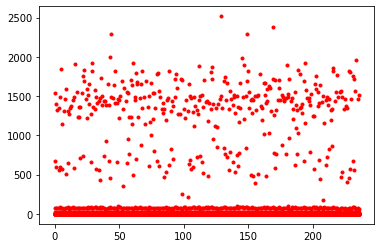

In [28]:
plt.plot(x_train.to_numpy(),"r.")
plt.show()

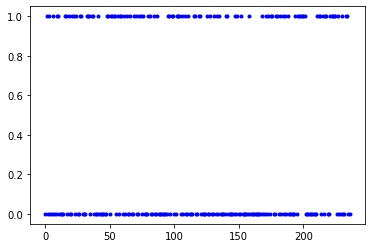

In [27]:
plt.plot(y_train.to_numpy(),"b.")
plt.show()

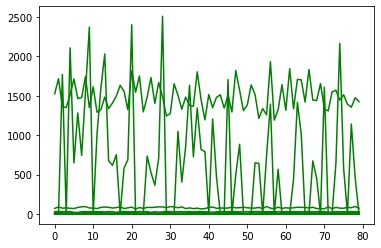

In [29]:
plt.plot(x_val.to_numpy(),color="green")
plt.show()

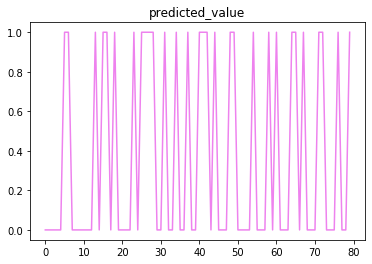

In [30]:
plt.plot(predictions,color="violet")
plt.title('predicted_value')
plt.show()

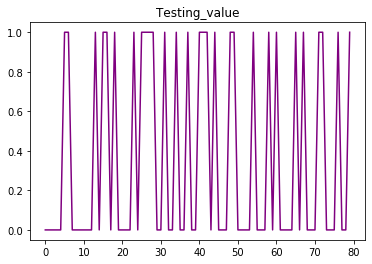

In [31]:
plt.plot(y_val.to_numpy(),color='purple')
plt.title('Testing_value')
plt.show()